# Installation und Einbindung von Packages

Julia verwendet sogenannte Umgebungen, um Software Package zu installieren. Eine Umgebung wird jeweils *aktiviert*. 

Wir aktivieren zunächst die Umgebung "NB01".

In [1]:
using Pkg; # Package Manager laden

In [ ]:
Pkg.activate("NB01")

Um sicher zu gehen, dass auch alle Packages in `Basisc` mit den richtigen Dependencies installiert sind, führen wir `instantiate` aus (um die Dependencies zu aktualisieren, kann zusätzlich `resolve`ausgeführt werden).

In [ ]:
Pkg.instantiate()

Alternativ können wir auch die Packages mit den aktuellsten Dependencies installieren:

In [ ]:
Pkg.update()

Wir können nun schauen, welche Packages installiert sind.

In [5]:
Pkg.status()

Status `~/Meine Dokumente/GitHub/Elemente-der-Datenanalyse-und-der-Kuenstlichen-Intelligenz/Notebooks/01/NB01/Project.toml`
  [91a5bcdd] Plots v1.41.3


Im Folgenden gehen wir nun einige grundlegende Funktionen von Julia durch.

# Variablen

In [6]:
my_integer = 4

4

In [7]:
typeof(my_integer)

Int64

In [8]:
my_float = 2.3

2.3

In [9]:
typeof(my_float)

Float64

In [10]:
my_complex_number = 2 + 3im
typeof(my_complex_number)

Complex{Int64}

In [11]:
my_complex_number2 = 2.2 + 3.2im
typeof(my_complex_number2)

ComplexF64 (alias for Complex{Float64})

In [12]:
?Complex

search: Complex complex ComplexF64 ComplexF32 ComplexF16



```julia
Complex{T<:Real} <: Number
```

Complex number type with real and imaginary part of type `T`.

`ComplexF16`, `ComplexF32` and `ComplexF64` are aliases for `Complex{Float16}`, `Complex{Float32}` and `Complex{Float64}` respectively.

See also: [`Real`](@ref), [`complex`](@ref), [`real`](@ref).


In [13]:
# Support für unicode
α = 2π

6.283185307179586

In [14]:
cos(α)

1.0

# Grundlende Syntax für mathematische Operationen

In [15]:
summation = 2 + 3

5

In [16]:
difference = 5 - 2

3

In [17]:
product = 3 * 5

15

In [18]:
quotient = 4 / 5

0.8

In [19]:
rational = 4 // 5
rational, typeof(rational)

(4//5, Rational{Int64})

In [20]:
power = 5^2

25

In [21]:
power = 5.0^2

25.0

# Control Flow

### For loops

The syntax for a `for` loop is 
```julia
for *var* in *loop iterable*
    *loop body*
end
```

In [22]:
a = [1, 2, 3, 4, 5]
for aᵢ in a
    @show aᵢ
end

aᵢ = 1
aᵢ = 2
aᵢ = 3
aᵢ = 4
aᵢ = 5


## If statements

In [23]:
v = 3
w = 3

if v < w
    println("v < w")
elseif v > w
    println("v > w")
else
    println("v == w")
end

v == w


# Arrays

Julia unterstützt multi-dimensionale Arrays (i.e. tensors).

In [24]:
vector = [1, 2, 3, 4, 5]

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [25]:
matrix = [1 2 3; 4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [26]:
spacing_matrix = [1 2 3
                  4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [27]:
random_matrix = rand(1:10, 4, 5)

4×5 Matrix{Int64}:
  8  8  3  1  5
  4  5  2  1  2
 10  1  6  3  1
  3  7  7  2  9

In [28]:
random_tensor = rand(1:10, 2, 3, 4)

2×3×4 Array{Int64, 3}:
[:, :, 1] =
 1  10  3
 3   8  8

[:, :, 2] =
  9  2   2
 10  9  10

[:, :, 3] =
 7  7  7
 3  3  9

[:, :, 4] =
 3  2  3
 1  7  8

### Manipulation von Arrays 

In [29]:
vector

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [30]:
vector[2:4]

3-element Vector{Int64}:
 2
 3
 4

In [31]:
vector[4:end]

2-element Vector{Int64}:
 4
 5

In [32]:
matrix

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [33]:
matrix[:, 2]

2-element Vector{Int64}:
 2
 5

In [34]:
matrix[1,:]

3-element Vector{Int64}:
 1
 2
 3

In [35]:
matrix[:, 1:2]

2×2 Matrix{Int64}:
 1  2
 4  5

In [36]:
[vector vector]

5×2 Matrix{Int64}:
 1  1
 2  2
 3  3
 4  4
 5  5

In [37]:
[vector; vector]

10-element Vector{Int64}:
 1
 2
 3
 4
 5
 1
 2
 3
 4
 5

In [38]:
[matrix matrix]

2×6 Matrix{Int64}:
 1  2  3  1  2  3
 4  5  6  4  5  6

In [39]:
[matrix; matrix]

4×3 Matrix{Int64}:
 1  2  3
 4  5  6
 1  2  3
 4  5  6

# Funktionen, Multiple Dispatch

Eine typische Funktion hat die Form:
```julia
function *func_name*(*arg1*, *arg2*, ...)
   *body* 
end
```

In [40]:
function biased_sum(a, b)
    a + b + 2
end 

biased_sum (generic function with 1 method)

In [41]:
biased_sum(2, 3)

7

In [42]:
methods(biased_sum)

# 1 method for generic function "biased_sum" from Main:
 [1] biased_sum(a, b)
     @ In[40]:1

In [43]:
function biased_sum(a::Integer, b::Integer)
    a + b - 3
end

biased_sum (generic function with 2 methods)

In [44]:
biased_sum(2, 3)

2

In [45]:
biased_sum(5.0, 2.0)

9.0

In [46]:
methods(biased_sum)

# 2 methods for generic function "biased_sum" from Main:
 [1] biased_sum(a::Integer, b::Integer)
     @ In[43]:1
 [2] biased_sum(a, b)
     @ In[40]:1

In [47]:
biased_sum(a::Complex, b) = a + b - 2im

biased_sum (generic function with 3 methods)

In [48]:
biased_sum(2+3im, 2)

4 + 1im

In [49]:
# Keyword arguments

In [50]:
function biased_pow(a, b; bias::Bool = true)
    if bias
        a^b - 3
    else
        a^b
    end
end

biased_pow (generic function with 1 method)

In [51]:
biased_pow(2, 3)

5

In [52]:
biased_pow(2, 3; bias = false)

8

In [53]:
biased_pow(2, 3; bias = true)

5

# Plotting

In [ ]:
using Plots # Wir müssen das Plotting Package laden

In [55]:
x = -5:0.5:5
f(x) = x^2 + 4x - 2
y = map(f, x)

21-element Vector{Float64}:
  3.0
  0.25
 -2.0
 -3.75
 -5.0
 -5.75
 -6.0
 -5.75
 -5.0
 -3.75
 -2.0
  0.25
  3.0
  6.25
 10.0
 14.25
 19.0
 24.25
 30.0
 36.25
 43.0

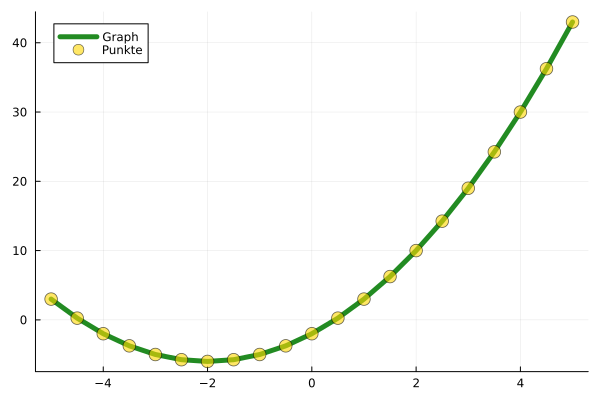

In [56]:
plot(x, y, linewidth = 5, linecolor = :forestgreen, label = "Graph")
scatter!(x, y, markersize = 7, markercolor = :gold, 
                                markerstrokealpha = 0.1,
                                markeralpha = 0.6,
                                label = "Punkte")